# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane have the lowest average tumor volume among all treaments, and the lowest final tumor volume among the focus group of [Capomulin, Ramicane, Infubinol, and Ceftamin].
- Capomulin and Ramicane also have the highest number of mice tested.
- The sex of the tested mice is almost equally disttributed between male and female
- The mouse weight and average tumor size appear to be highly correlated for the Capomulin treatment regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

complete_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview

complete_data.head(200)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
195,i738,Capomulin,Female,23,20,0,45.000000,0
196,i738,Capomulin,Female,23,20,5,45.595685,0
197,i738,Capomulin,Female,23,20,10,43.421014,0
198,i738,Capomulin,Female,23,20,15,37.978778,0


In [2]:
# Checking the number of mice.

complete_data['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

c_d_counts = complete_data[['Mouse ID', 'Timepoint']].value_counts()

duplicate = c_d_counts[(c_d_counts >= 2)].index[0][0]

duplicate

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

complete_data.loc[(complete_data["Mouse ID"] == duplicate)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

complete_data.drop(complete_data[complete_data['Mouse ID'] == duplicate].index, inplace = True)

complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.

complete_data['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = complete_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()

median = complete_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()

var = complete_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()

std = complete_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()

sem = complete_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

summary = pd.DataFrame({'Mean Tumor Volume' : mean, 'Median Tumor Volume' : median,
                        'Tumor Volume Variance' : var, 'Tumor Volume Std. Dev.' : std,
                        'Tumor Volume Std. Err.' : sem})
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_agg = complete_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].aggregate(["mean", "median", "var", "std", "sem"])

summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

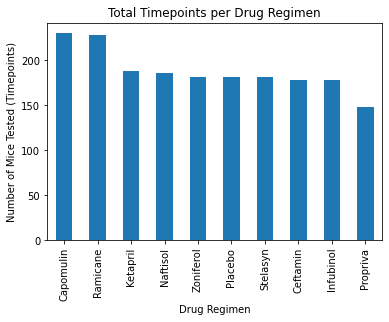

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

count_per_regimen = complete_data.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending = False)

count_per_regimen.plot.bar(ylabel="Number of Mice Tested (Timepoints)", title="Total Timepoints per Drug Regimen")

plt.show()

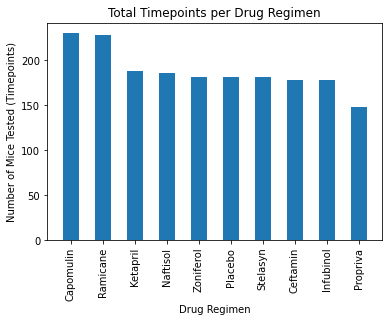

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(count_per_regimen.index,count_per_regimen.values, color='tab:blue', align="center", width=0.5)

plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested (Timepoints)")

plt.xticks(rotation="vertical")

plt.show()

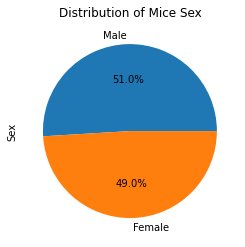

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

complete_data['Sex'].value_counts().plot.pie(autopct='%1.1f%%', title='Distribution of Mice Sex')

plt.show()

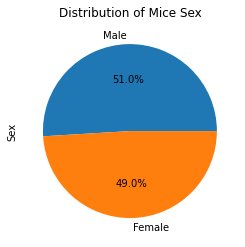

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = complete_data['Sex'].value_counts().index
sizes = complete_data['Sex'].value_counts().values

plt.pie(sizes, labels=labels,autopct='%1.1f%%')

plt.title("Distribution of Mice Sex")

plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

reduced_data = complete_data.loc[(complete_data['Drug Regimen'] == 'Capomulin') | 
                             (complete_data['Drug Regimen'] == 'Ramicane') |
                             (complete_data['Drug Regimen'] == 'Infubinol') |
                             (complete_data['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse

max_time = reduced_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_tumor = pd.merge(reduced_data, max_time, on=["Mouse ID","Timepoint"], how = "inner")

max_tumor = max_tumor[['Drug Regimen','Tumor Volume (mm3)']]

max_tumor

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,22.050126
1,Capomulin,23.343598
2,Capomulin,28.484033
3,Capomulin,28.430964
4,Ramicane,29.128472
...,...,...
95,Ceftamin,61.386660
96,Infubinol,67.685569
97,Ceftamin,68.594745
98,Ceftamin,64.729837


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

drug = max_tumor['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for e in drug:
    tumor_vol = max_tumor.loc[(max_tumor['Drug Regimen'] == e)]
    quartiles = tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol['Tumor Volume (mm3)'] > upper_bound) |
                             (tumor_vol['Tumor Volume (mm3)'] < lower_bound)]['Tumor Volume (mm3)'].values
    
    print(f"{e}'s potential outliers are {outliers}")
    

Ramicane's potential outliers are []
Capomulin's potential outliers are []
Infubinol's potential outliers are [36.3213458]
Ceftamin's potential outliers are []


## Line and Scatter Plots

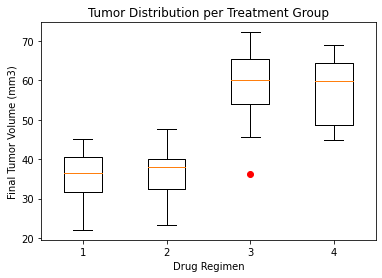

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


tumor_vol_df = pd.DataFrame()

for e in drug:
    tumor_vol_df[e] = max_tumor.loc[(max_tumor['Drug Regimen'] == e)].reset_index()['Tumor Volume (mm3)']
    

tumor_vol_df

fig1, ax1 = plt.subplots()

ax1.boxplot(tumor_vol_df, 0, 'ro')

ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.set_title("Tumor Distribution per Treatment Group")


plt.show()

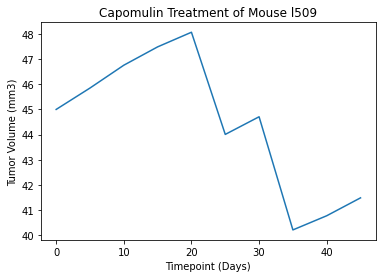

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capo_l509 = complete_data.loc[(complete_data['Drug Regimen'] == 'Capomulin') & (complete_data['Mouse ID'] == 'l509')]
                          
capo_l509 = capo_l509.set_index('Timepoint')['Tumor Volume (mm3)']

fig2, ax2 = plt.subplots()

ax2 = capo_l509.plot()

ax2.set_ylabel("Tumor Volume (mm3)")
ax2.set_xlabel("Timepoint (Days)")
ax2.set_title("Capomulin Treatment of Mouse l509")

plt.show()

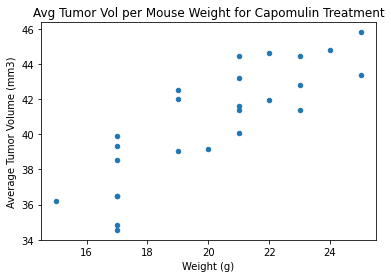

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capo = complete_data.loc[(complete_data['Drug Regimen'] == 'Capomulin')]

capo = capo.groupby('Mouse ID').mean().reset_index()[['Tumor Volume (mm3)','Weight (g)']]

capo.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)',
                  title="Avg Tumor Vol per Mouse Weight for Capomulin Treatment",
                 ylabel="Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume 0.84


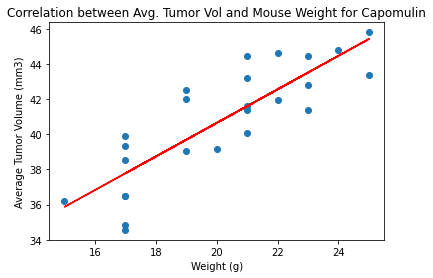

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capo['Weight (g)']
y_values = capo['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Correlation between Avg. Tumor Vol and Mouse Weight for Capomulin')
print(f"The correlation between mouse weight and the average tumor volume {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.show()